Load  the data into a `df` variable. It will select 50k orders randomly (`ORDER BY rand()` in the SQL query).

In [ ]:
from google.colab import auth
import pandas as pd
import pandas_gbq

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pandas_gbq.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

Downloading: 100%|██████████|


turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0             95.04            66.87            0.0           0.00   
1              5.68            10.16            0.0         142.91   
2            214.18             0.00            0.0           4.66   
3             36.64             0.00            0.0           0.00   
4              0.00            41.53            0.0         145.96   

   turnover_fresh  promo_rate  
0             0.0    0.021345  
1             0.0    0.043622  
2             0.0    0.032087  
3             0.0         NaN  
4             0.0         NaN

In [ ]:
df.shape

(50000, 6)

Check null values

In [ ]:
print(df.isnull().sum())

turnover_grocery        0
turnover_beauty         0
turnover_baby           0
turnover_home           0
turnover_fresh          0
promo_rate          16159
dtype: int64


Replace null values

In [ ]:
df.fillna(0, inplace=True)

In a variable called `df_orders`, keep all the turnover columns from the original df

In [ ]:
df_orders = df[["turnover_grocery", "turnover_beauty",	"turnover_baby",	"turnover_home", "turnover_fresh"]]

In [ ]:
df_orders

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0                 79.00             0.00           0.00           0.00   
1                  0.00             0.00           0.00          24.89   
2                  0.00            34.78           0.00           0.00   
3                  0.00             0.00          73.67           0.00   
4                  5.53             0.00           0.00          16.22   
...                 ...              ...            ...            ...   
49995             15.41            35.12          88.32           0.00   
49996              9.23            53.19           0.00           0.00   
49997             31.72             4.78           0.00           6.08   
49998             70.24             0.00           0.00           0.00   
49999              5.73            45.35           0.00           0.00   

       turnover_fresh  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
49995             0.0  
49996             0.0  
49997             0.0  
49998             0.0  
49999             0.0  

[50000 rows x 5 columns]

Check if the distribution of turnover is different per category

In [ ]:
import plotly.express as px
fig = px.box(df_orders)
fig.show()

Delete the `turnover_fresh` column from `df_orders`.

In [ ]:
df_orders = df_orders.drop(columns = "turnover_fresh")

In [ ]:
df_orders

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0                 79.00             0.00           0.00           0.00
1                  0.00             0.00           0.00          24.89
2                  0.00            34.78           0.00           0.00
3                  0.00             0.00          73.67           0.00
4                  5.53             0.00           0.00          16.22
...                 ...              ...            ...            ...
49995             15.41            35.12          88.32           0.00
49996              9.23            53.19           0.00           0.00
49997             31.72             4.78           0.00           6.08
49998             70.24             0.00           0.00           0.00
49999              5.73            45.35           0.00           0.00

[50000 rows x 4 columns]

Train a first k-means algorithm


In [ ]:
X = df_orders

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)



In [ ]:
#Clustering Kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

In [ ]:
kmeans_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 0.11155045,  0.10818043, -0.40277054,  0.07224598],
       [-0.47370899, -0.45939791,  1.71040123, -0.30679906]])

Use elbow method to check inertias with differing numbers of starting clusters.

In [ ]:
inertias = [0]
n_k = range(1, 10)

# for each number of centroids
for k in n_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

inertias

[0,
 200000.00000000064,
 168580.060774908,
 136660.6338591564,
 109228.20440588752,
 99798.23501884511,
 76832.33019133842,
 70089.59898969307,
 66973.68458354431,
 57128.67135614454]

Display a line chart of all inertias.

In [ ]:
fig = px.line(y = inertias, markers=True )
fig.show()

Train a new model with 4 clusters

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=100 )
kmeans.fit(X)
kmeans_pred = kmeans.labels_

In [ ]:
kmeans_pred

array([0, 1, 3, ..., 1, 0, 3], dtype=int32)

In [ ]:
labels = kmeans.predict(X)
labels

array([0, 1, 3, ..., 1, 0, 3], dtype=int32)

Count visualize number of samples per cluster

<Axes: ylabel='count'>

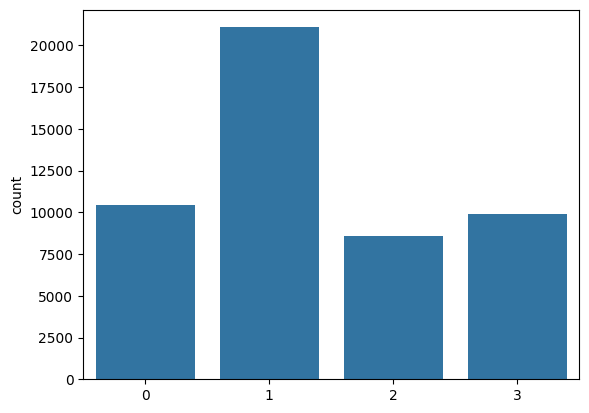

In [ ]:
import seaborn as sns


sns.countplot(x = labels)

Overall, orders are well distributed.

Get the values of the center for each cluster using the `.cluster_centers_` attribute on your KMeans object.


In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 1.42628938, -0.33731338, -0.4239954 , -0.25442506],
       [-0.35650776, -0.326964  , -0.34813236,  0.34253105],
       [-0.48184233, -0.47479246,  1.82626869, -0.31919448],
       [-0.33514405,  1.46553014, -0.39014788, -0.18377264]])

In [ ]:
centroid_df = pd.DataFrame(centroids, columns=df_orders.columns)

In [ ]:
centroid_df

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0          1.426289        -0.337313      -0.423995      -0.254425
1         -0.356508        -0.326964      -0.348132       0.342531
2         -0.481842        -0.474792       1.826269      -0.319194
3         -0.335144         1.465530      -0.390148      -0.183773

Add to `df` a new column label containing labels of each sample.

In [ ]:
df["label"] = labels

In [ ]:
df

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0                 79.00             0.00           0.00           0.00   
1                  0.00             0.00           0.00          24.89   
2                  0.00            34.78           0.00           0.00   
3                  0.00             0.00          73.67           0.00   
4                  5.53             0.00           0.00          16.22   
...                 ...              ...            ...            ...   
49995             15.41            35.12          88.32           0.00   
49996              9.23            53.19           0.00           0.00   
49997             31.72             4.78           0.00           6.08   
49998             70.24             0.00           0.00           0.00   
49999              5.73            45.35           0.00           0.00   

       turnover_fresh  promo_rate  label  
0                 0.0    0.000000      0  
1                 0.0    0.000000      1  
2                 0.0    0.033266      3  
3                 0.0    0.250000      2  
4                 0.0    0.012713      1  
...               ...         ...    ...  
49995             0.0    0.031804      2  
49996             0.0    0.010477      3  
49997             0.0    0.026256      1  
49998             0.0    0.063539      0  
49999             0.0    0.028318      3  

[50000 rows x 7 columns]

In [ ]:
df[df["promo_rate"] > 0].groupby("label").size()

label
0     8113
1    12819
2     5561
3     7344
dtype: int64

In [ ]:
df[df["promo_rate"] > 0].groupby("label").size() / df.groupby("label").size()

label
0    0.776512
1    0.608025
2    0.648513
3    0.742268
dtype: float64

Where the promotion rate is greater than zero, we can see that the cluster we have associated with greater grocery turnover uses promotion codes more than others.